In [1]:
from flood_prediction import notebook_utils

notebook_utils.init()

Package root is '/home/mahdi/flood-prediction'.


In [2]:
import typing
from collections.abc import Callable

import matplotlib.pyplot as plt
import numpy as np
import polars as pl
import seaborn as sns
import statsmodels.stats.weightstats  # type: ignore

from flood_prediction import _type_aliases, constants, dataset, utils


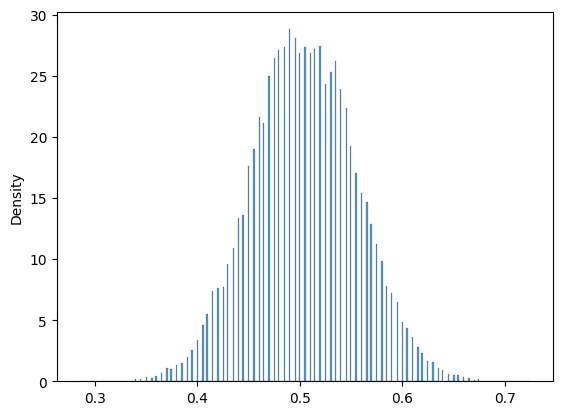

In [51]:
def plot_target_distribution():
    """Plot the distribution of the target feature."""
    sns.histplot(
        x=utils.column_to_series(
            dataset.load("train"), constants.TARGET_FEATURE
        ).to_numpy(),
        stat="density",
    )


plot_target_distribution()

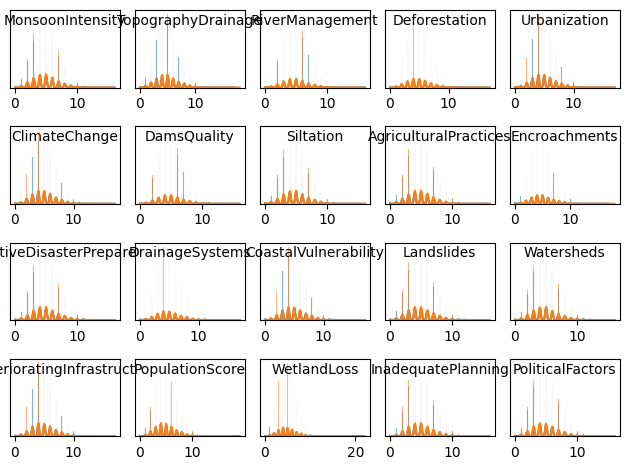

In [50]:
def plot_all_feature_distributions():
    """Plot all the feature distributions."""
    train_df = dataset.load("train", as_pandas=True)
    test_df = dataset.load("test", as_pandas=True)
    n_cols = int(np.ceil((n := len(test_df.columns)) ** 0.5))
    fig, axes = plt.subplots(nrows=int(np.ceil(n / n_cols)), ncols=n_cols)
    axs: typing.Sequence[plt.Axes] = axes.flatten()
    for ax, col in zip(axs, test_df.columns):
        sns.histplot(test_df[col], ax=ax, stat="density", kde=True)
        sns.histplot(train_df[col], ax=ax, stat="density", kde=True)
        ax.get_yaxis().set_visible(False)
        ax.get_xaxis().set_label_coords(0.5, 0.95)
    fig.tight_layout()


plot_all_feature_distributions()

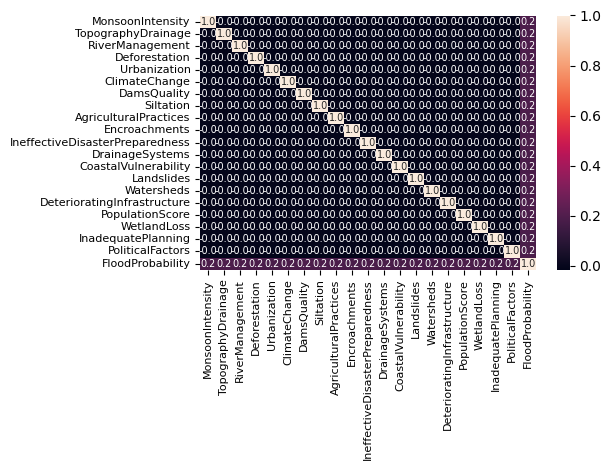

In [40]:
def plot_correlation_matrix(
    tick_font_size: float = 8, annotation_font_size: float | str = "x-small"
):
    """Plot the correlation of each feature against each other."""
    sns.heatmap(
        dataset.load("train", as_pandas=True).corr(),
        annot=True,
        annot_kws={"size": annotation_font_size},
        fmt=".1f",
    )
    plt.yticks(fontsize=tick_font_size)
    plt.xticks(fontsize=tick_font_size)
    plt.tight_layout()


plot_correlation_matrix()

In [53]:
def compare_features(
    test: Callable[[np.ndarray, np.ndarray], float] = utils.return_arg(  # noqa: B008
        statsmodels.stats.weightstats.ztest, -1
    ),
) -> pl.LazyFrame:
    """Compare the distributions of each feature."""
    features = typing.get_args(_type_aliases.DatasetFeature)
    train_df = dataset.load("train")
    test_df = dataset.load("test")
    return pl.DataFrame(
        {
            feature: test(
                utils.column_to_series(train_df, feature).to_numpy(),
                utils.column_to_series(test_df, feature).to_numpy(),
            )
            for feature in features
        }
    )


compare_features()

MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.057542,0.248063,0.128888,0.210368,0.188828,0.853261,0.406196,0.963998,0.385156,0.65526,0.479701,0.350957,0.30407,0.226967,0.587956,0.959796,0.856167,0.430831,0.902063,0.115713
